In [105]:
!pip install dmba

In [106]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [107]:
toronto_df = pd.read_csv("./Regression_Data_Toronto.csv")

In [108]:
toronto_df.dtypes

Date                                          object
City                                          object
Region                                        object
Inventory                                      int64
Total Available                                int64
Availability Rate                            float64
Occupied                                       int64
Total Vacant                                   int64
Vacancy Rate                                 float64
Absorption                                     int64
Absorption YTD                                 int64
New Supply                                     int64
New Supply YTD                                 int64
Under Construction                             int64
Average Net Asking Lease Rate ($/sq. ft.)    float64
TMI ($/sq. ft.)                              float64
Gross Rental Rate PSF ($/sq. ft.)            float64
Average Asking Sale Price ($/sq. ft.)        float64
Average Land Costs $/Acre                     

In [109]:
toronto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date                                       76 non-null     object 
 1   City                                       76 non-null     object 
 2   Region                                     76 non-null     object 
 3   Inventory                                  76 non-null     int64  
 4   Total Available                            76 non-null     int64  
 5   Availability Rate                          76 non-null     float64
 6   Occupied                                   76 non-null     int64  
 7   Total Vacant                               76 non-null     int64  
 8   Vacancy Rate                               76 non-null     float64
 9   Absorption                                 76 non-null     int64  
 10  Absorption YTD              

In [110]:
toronto_df['GDP Value (Million CAD)'] = pd.Series(pd.to_numeric(toronto_df['GDP Value (Million CAD)'], errors = 'coerce')).interpolate(method = 'linear', limit_area = 'outside', limit_direction = 'both')

In [111]:
toronto_df.head()

,Date,City,Region,Inventory,Total Available,Availability Rate,Occupied,Total Vacant,Vacancy Rate,Absorption,...,Average Net Asking Lease Rate ($/sq. ft.),TMI ($/sq. ft.),Gross Rental Rate PSF ($/sq. ft.),Average Asking Sale Price ($/sq. ft.),Average Land Costs $/Acre,Employment Rate (%),Population (thusands),Unemployment rate (%),GDP Value (Million CAD),Inflation Value (2002 = 100)
0,2002_Q1,Toronto,Toronto,20775085,213253,0.010,20561832,107486,0.005,-29767,...,4.53,3.01,7.54,68.53,325000,65.0,3962.3,7.2,325000,99.6
1,2002_Q2,Toronto,Toronto,20775085,239549,0.012,20535536,106914,0.005,-26296,...,5.03,3.75,8.78,66.05,325000,64.1,3990.7,7.4,325000,100.0
2,2002_Q3,Toronto,Toronto,20775085,660337,0.032,20114748,492726,0.024,-420788,...,6.70,3.75,10.45,64.20,325000,64.4,4015.4,7.7,325000,100.4
3,2002_Q4,Toronto,Toronto,20775085,483415,0.023,20291670,134960,0.006,176922,...,7.13,3.75,10.88,68.00,325000,65.0,4032.4,7.4,325000,101.3
4,2003_Q1,Toronto,Toronto,20775085,540956,0.026,20234129,180970,0.009,-57541,...,6.75,3.75,10.50,71.28,325000,65.4,4048.8,7.3,325000,103.1


In [112]:
toronto_df.isnull().sum()

Date                                         0
City                                         0
Region                                       0
Inventory                                    0
Total Available                              0
Availability Rate                            0
Occupied                                     0
Total Vacant                                 0
Vacancy Rate                                 0
Absorption                                   0
Absorption YTD                               0
New Supply                                   0
New Supply YTD                               0
Under Construction                           0
Average Net Asking Lease Rate ($/sq. ft.)    0
TMI ($/sq. ft.)                              0
Gross Rental Rate PSF ($/sq. ft.)            0
Average Asking Sale Price ($/sq. ft.)        0
Average Land Costs $/Acre                    0
Employment Rate (%)                          0
Population (thusands)                        0
Unemployment 

In [113]:
toronto_df.columns

Index(['Date', 'City', 'Region', 'Inventory', 'Total Available',
       'Availability Rate', 'Occupied', 'Total Vacant', 'Vacancy Rate',
       'Absorption', 'Absorption YTD', 'New Supply', 'New Supply YTD',
       'Under Construction', 'Average Net Asking Lease Rate ($/sq. ft.)',
       'TMI ($/sq. ft.)', 'Gross Rental Rate PSF ($/sq. ft.)',
       'Average Asking Sale Price ($/sq. ft.)', 'Average Land Costs $/Acre',
       'Employment Rate (%)', 'Population (thusands)', 'Unemployment rate (%)',
       'GDP Value (Million CAD)', 'Inflation Value (2002 = 100)'],
      dtype='object')

In [114]:
predictors = ['Inventory', 'Total Available', 'Availability Rate', 'Absorption', 'Absorption YTD', 'New Supply', 'New Supply YTD', 'Under Construction', 'Average Net Asking Lease Rate ($/sq. ft.)', 'TMI ($/sq. ft.)', 'Gross Rental Rate PSF ($/sq. ft.)', 'Average Asking Sale Price ($/sq. ft.)', 'Average Land Costs $/Acre', 'Employment Rate (%)', 'Population (thusands)', 'Unemployment rate (%)', 'GDP Value (Million CAD)', 'Inflation Value (2002 = 100)']

outcome = 'Vacancy Rate'

In [115]:
x = toronto_df[predictors]
y = toronto_df[outcome]

In [116]:
sc = StandardScaler()
X[predictors] = sc.fit_transform(X[predictors])

In [117]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [118]:
#fit regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [119]:
# print coefficients
print('intercept ', lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': lm.coef_}))

intercept  -0.0072981504965428734
                                    Predictor   coefficient
0                                   Inventory  1.509831e-10
1                             Total Available  6.081974e-08
2                           Availability Rate -9.271062e-01
3                                  Absorption -1.434092e-09
4                              Absorption YTD  2.004061e-09
5                                  New Supply -9.700866e-09
6                              New Supply YTD -7.629743e-09
7                          Under Construction  6.556588e-12
8   Average Net Asking Lease Rate ($/sq. ft.)  4.277988e-04
9                             TMI ($/sq. ft.) -9.042322e-04
10          Gross Rental Rate PSF ($/sq. ft.) -4.764334e-04
11      Average Asking Sale Price ($/sq. ft.) -1.840534e-05
12                  Average Land Costs $/Acre  4.743801e-09
13                        Employment Rate (%)  1.066269e-04
14                      Population (thusands) -2.762714e-05
15    

In [120]:
# Performance Measures for Training Set
regressionSummary(y_train, lm.predict(X_train))


Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 0.0021
     Mean Absolute Error (MAE) : 0.0017


In [121]:
# Performance Measures for Validation Set
regressionSummary(y_valid, lm.predict(X_valid))


Regression statistics

               Mean Error (ME) : 0.0007
Root Mean Squared Error (RMSE) : 0.0049
     Mean Absolute Error (MAE) : 0.0034


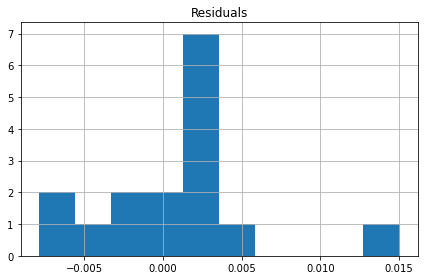

In [122]:
#Plotting the Error Residual Histogram

lm_pred = lm.predict(X_valid)
all_residuals = y_valid - lm_pred

ax = pd.DataFrame({'Residuals': all_residuals}).hist()
plt.tight_layout()

In [123]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X_train[variables], y_train)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y_train, [y_train.mean()] * len(y_train), model, df=1)
    return AIC_score(y_train, model.predict(X_train[variables]), model)

### Best Model (via Backward Elimination)

In [124]:
best_model, best_variables = backward_elimination(X_train.columns, train_model, score_model, verbose = True)

print(best_variables)

Variables: Inventory, Total Available, Availability Rate, Absorption, Absorption YTD, New Supply, New Supply YTD, Under Construction, Average Net Asking Lease Rate ($/sq. ft.), TMI ($/sq. ft.), Gross Rental Rate PSF ($/sq. ft.), Average Asking Sale Price ($/sq. ft.), Average Land Costs $/Acre, Employment Rate (%), Population (thusands), Unemployment rate (%), GDP Value (Million CAD), Inflation Value (2002 = 100)
Start: score=-526.99
Step: score=-528.99, remove Average Net Asking Lease Rate ($/sq. ft.)
Step: score=-530.99, remove New Supply
Step: score=-532.99, remove Under Construction
Step: score=-534.98, remove Unemployment rate (%)
Step: score=-536.97, remove GDP Value (Million CAD)
Step: score=-538.90, remove Gross Rental Rate PSF ($/sq. ft.)
Step: score=-540.77, remove Inventory
Step: score=-542.43, remove New Supply YTD
Step: score=-544.07, remove Absorption
Step: score=-545.53, remove Employment Rate (%)
Step: score=-546.40, remove Absorption YTD
Step: score=-547.04, remove TMI 

In [125]:
regressionSummary(y_valid, best_model.predict(X_valid[best_variables]))


Regression statistics

               Mean Error (ME) : 0.0012
Root Mean Squared Error (RMSE) : 0.0051
     Mean Absolute Error (MAE) : 0.0036


In [126]:
X[best_variables]

,Total Available,Availability Rate,Average Asking Sale Price ($/sq. ft.),Average Land Costs $/Acre,Population (thusands),Inflation Value (2002 = 100)
0,-0.567867,-0.534532,-0.788164,-0.739286,-1.618503,-1.646058
1,-0.486351,-0.391236,-0.810686,-0.739286,-1.561903,-1.613925
2,0.818078,1.041725,-0.827487,-0.739286,-1.512676,-1.581793
3,0.269626,0.396892,-0.792977,-0.739286,-1.478796,-1.509494
4,0.448001,0.611837,-0.763190,-0.739286,-1.446111,-1.364897
...,...,...,...,...,...,...
71,-1.194845,-1.251013,1.587831,2.605698,1.684256,1.607372
72,-0.896306,-0.892772,1.587831,2.685578,1.743447,1.607372
73,-0.820760,-0.821124,0.492619,2.685578,1.795265,1.655571
74,-0.977630,-0.964420,0.492619,2.805399,1.841701,1.599339


In [127]:
y

0     0.005
1     0.005
2     0.024
3     0.006
4     0.009
      ...  
71    0.000
72    0.003
73    0.004
74    0.002
75    0.004
Name: Vacancy Rate, Length: 76, dtype: float64

In [128]:
y_preds = best_model.predict(X[best_variables])

In [129]:
final_preds_data = X[best_variables]
final_preds_data['y_Actual'] = y
final_preds_data['y_predicted'] = y_preds

<ipython-input-129-0636d116ebcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_preds_data['y_Actual'] = y
<ipython-input-129-0636d116ebcc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_preds_data['y_predicted'] = y_preds


In [130]:
final_preds_data

,Total Available,Availability Rate,Average Asking Sale Price ($/sq. ft.),Average Land Costs $/Acre,Population (thusands),Inflation Value (2002 = 100),y_Actual,y_predicted
0,-0.567867,-0.534532,-0.788164,-0.739286,-1.618503,-1.646058,0.005,0.656036
1,-0.486351,-0.391236,-0.810686,-0.739286,-1.561903,-1.613925,0.005,0.478955
2,0.818078,1.041725,-0.827487,-0.739286,-1.512676,-1.581793,0.024,-1.292202
3,0.269626,0.396892,-0.792977,-0.739286,-1.478796,-1.509494,0.006,-0.495077
4,0.448001,0.611837,-0.763190,-0.739286,-1.446111,-1.364897,0.009,-0.760581
...,...,...,...,...,...,...,...,...
71,-1.194845,-1.251013,1.587831,2.605698,1.684256,1.607372,0.000,1.545473
72,-0.896306,-0.892772,1.587831,2.685578,1.743447,1.607372,0.003,1.102672
73,-0.820760,-0.821124,0.492619,2.685578,1.795265,1.655571,0.004,1.014191
74,-0.977630,-0.964420,0.492619,2.805399,1.841701,1.599339,0.002,1.191241


In [131]:
final_preds_data.sort_values(by = 'y_Actual', inplace = True, ascending = False)

<ipython-input-131-8294c2664a3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_preds_data.sort_values(by = 'y_Actual', inplace = True, ascending = False)


In [132]:
final_preds_data

,Total Available,Availability Rate,Average Asking Sale Price ($/sq. ft.),Average Land Costs $/Acre,Population (thusands),Inflation Value (2002 = 100),y_Actual,y_predicted
37,1.853582,1.829853,-0.523619,-0.389810,-0.093279,0.008773,0.027,-2.264459
2,0.818078,1.041725,-0.827487,-0.739286,-1.512676,-1.581793,0.024,-1.292202
36,1.689237,1.686557,-0.542236,-0.389810,-0.130946,-0.055492,0.023,-2.087417
40,1.319795,1.328317,-0.332454,-0.389810,0.056194,0.153370,0.021,-1.644372
41,1.021275,0.970077,-0.320557,-0.389810,0.104823,0.129270,0.019,-1.201605
...,...,...,...,...,...,...,...,...
70,-1.228945,-1.251013,1.587831,2.605698,1.613705,1.575239,0.000,1.545435
64,-1.043492,-1.036068,1.870372,1.407495,1.192788,1.334245,0.000,1.279468
63,-1.004789,-1.036068,1.882003,1.407495,1.127817,1.117349,0.000,1.279204
54,-0.798706,-0.821124,-0.094700,-0.389810,0.683583,0.715691,0.000,1.013085


In [133]:
final_preds_data.to_excel('Decile_Chart_Data.xlsx')

### R2 Score

In [135]:
r2_score(y_train, best_model.predict(X_train[best_variables]))

0.8978181692038336

In [136]:
adjusted_r2_score(y_train, best_model.predict(X_train[best_variables]), best_model)

0.886250414774079

### Model Coefficients

In [137]:
# print coefficients
print('intercept ', best_model.intercept_)
print(pd.DataFrame({'Predictor': X[best_variables].columns, 'coefficient': best_model.coef_}))

intercept  -0.002714057179733681
                               Predictor   coefficient
0                        Total Available  7.281931e-08
1                      Availability Rate -1.236039e+00
2  Average Asking Sale Price ($/sq. ft.) -1.973145e-05
3              Average Land Costs $/Acre  3.121748e-09
4                  Population (thusands) -2.991309e-05
5           Inflation Value (2002 = 100)  1.224700e-03


### Partial R2 Score¶

In [138]:
best_variables

['Total Available',
 'Availability Rate',
 'Average Asking Sale Price ($/sq. ft.)',
 'Average Land Costs $/Acre',
 'Population (thusands)',
 'Inflation Value (2002 = 100)']

In [140]:
pg.partial_corr(data = toronto_df, x = 'Total Available', y = 'Vacancy Rate', 
                covar = ['Availability Rate', 'Average Asking Sale Price ($/sq. ft.)', 
                         'Average Land Costs $/Acre', 'Population (thusands)', 'Inflation Value (2002 = 100)'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,76,-0.030517,"[-0.25, 0.2]",0.000931,-0.02644,0.793558,0.148,0.057705


In [141]:
pg.partial_corr(data = toronto_df, x = 'Availability Rate', y = 'Vacancy Rate', 
                covar = ['Total Available', 'Average Asking Sale Price ($/sq. ft.)', 
                         'Average Land Costs $/Acre', 'Population (thusands)', 'Inflation Value (2002 = 100)'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,76,0.119488,"[-0.11, 0.34]",0.014277,-0.012729,0.303903,0.241,0.177784


In [142]:
pg.partial_corr(data = toronto_df, x = 'Average Asking Sale Price ($/sq. ft.)', y = 'Vacancy Rate', 
                covar = ['Total Available', 'Availability Rate', 
                         'Average Land Costs $/Acre', 'Population (thusands)', 'Inflation Value (2002 = 100)'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,76,-0.28364,"[-0.48, -0.06]",0.080452,0.055259,0.01303,2.948,0.707521


In [143]:
pg.partial_corr(data = toronto_df, x = 'Average Land Costs $/Acre', y = 'Vacancy Rate', 
                covar = ['Total Available', 'Availability Rate', 'Average Asking Sale Price ($/sq. ft.)',
                         'Population (thusands)', 'Inflation Value (2002 = 100)'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,76,0.028462,"[-0.2, 0.25]",0.00081,-0.026565,0.80718,0.148,0.05667


In [144]:
pg.partial_corr(data = toronto_df, x = 'Population (thusands)', y = 'Vacancy Rate', 
                covar = ['Total Available', 'Availability Rate', 'Average Asking Sale Price ($/sq. ft.)',
                         'Average Land Costs $/Acre', 'Inflation Value (2002 = 100)'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,76,-0.141106,"[-0.36, 0.09]",0.019911,-0.006941,0.224046,0.296,0.230375


In [145]:
pg.partial_corr(data = toronto_df, x = 'Inflation Value (2002 = 100)', y = 'Vacancy Rate', 
                covar = ['Total Available', 'Availability Rate', 'Average Asking Sale Price ($/sq. ft.)',
                         'Average Land Costs $/Acre', 'Population (thusands)'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,76,0.176891,"[-0.05, 0.39]",0.03129,0.00475,0.126359,0.451,0.335923


In [146]:
print(0.176891 + 0.141106 + 0.028462 + 0.28364 + 0.119488 + 0.030517)

0.780104


In [147]:
decile_gdp = toronto_df[['GDP Value (Million CAD)', 'Vacancy Rate']]
decile_gdp

,GDP Value (Million CAD),Vacancy Rate
0,325000,0.005
1,325000,0.005
2,325000,0.024
3,325000,0.006
4,325000,0.009
...,...,...
71,450318,0.000
72,384921,0.003
73,384921,0.004
74,384921,0.002


In [148]:
decile_gdp = decile_gdp.sort_values(by = 'Vacancy Rate', ascending = False)

In [149]:
decile_gdp

,GDP Value (Million CAD),Vacancy Rate
37,309981,0.027
2,325000,0.024
36,309981,0.023
40,322045,0.021
41,322045,0.019
...,...,...
70,450318,0.000
64,425182,0.000
63,405156,0.000
54,364219,0.000


In [150]:
new_df = toronto_df

In [151]:
X = new_df[predictors]
y = new_df[outcome]

SC = StandardScaler()
X[predictors] = SC.fit_transform(X[predictors])

<ipython-input-151-e047b003fc8f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[predictors] = SC.fit_transform(X[predictors])
C:\Users\Shamil\AppData\Local\Anaconda2\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [152]:
y

0     0.005
1     0.005
2     0.024
3     0.006
4     0.009
      ...  
71    0.000
72    0.003
73    0.004
74    0.002
75    0.004
Name: Vacancy Rate, Length: 76, dtype: float64

In [153]:
X['Vacancy Rate'] = y

<ipython-input-153-2b453ef6b77b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Vacancy Rate'] = y


In [154]:
X

,Inventory,Total Available,Availability Rate,Absorption,Absorption YTD,New Supply,New Supply YTD,Under Construction,Average Net Asking Lease Rate ($/sq. ft.),TMI ($/sq. ft.),Gross Rental Rate PSF ($/sq. ft.),Average Asking Sale Price ($/sq. ft.),Average Land Costs $/Acre,Employment Rate (%),Population (thusands),Unemployment rate (%),GDP Value (Million CAD),Inflation Value (2002 = 100),Vacancy Rate
0,-1.897948,-0.567867,-0.534532,-0.144980,-0.066614,-0.11547,-0.11547,0.0,-0.828871,-1.285927,-0.955625,-0.788164,-0.739286,1.322860,-1.618503,-0.305033,-0.652889,-1.646058,0.005
1,-1.897948,-0.486351,-0.391236,-0.121966,-0.166556,-0.11547,-0.11547,0.0,-0.657400,0.254630,-0.565142,-0.810686,-0.739286,0.818211,-1.561903,-0.164106,-0.652889,-1.613925,0.005
2,-1.897948,0.818078,1.041725,-2.737642,-1.765826,-0.11547,-0.11547,0.0,-0.084689,0.254630,-0.039249,-0.827487,-0.739286,0.986427,-1.512676,0.047285,-0.652889,-1.581793,0.024
3,-1.897948,0.269626,0.396892,1.225470,-1.093406,-0.11547,-0.11547,0.0,0.062776,0.254630,0.096160,-0.792977,-0.739286,1.322860,-1.478796,-0.164106,-0.652889,-1.509494,0.006
4,-1.897948,0.448001,0.611837,-0.329136,-0.172174,-0.11547,-0.11547,0.0,-0.067542,0.254630,-0.023504,-0.763190,-0.739286,1.547149,-1.446111,-0.234570,-0.652889,-1.364897,0.009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.402952,-1.194845,-1.251013,-0.020546,0.194076,-0.11547,-0.11547,0.0,0.618340,1.711914,0.826742,1.587831,2.605698,0.145345,1.684256,-1.432451,2.303003,1.607372,0.000
72,0.402952,-0.896306,-0.892772,-0.586153,-0.319498,-0.11547,-0.11547,0.0,4.476425,1.711914,4.369433,1.587831,2.685578,-0.471449,1.743447,-1.150597,0.760475,1.607372,0.003
73,0.402952,-0.820760,-0.821124,-0.109196,-0.412120,-0.11547,-0.11547,0.0,3.328087,1.816006,3.330716,0.492619,2.685578,-5.237583,1.795265,4.204638,0.760475,1.655571,0.004
74,0.402952,-0.977630,-0.964420,0.387919,-0.219792,-0.11547,-0.11547,0.0,3.994387,0.067265,3.678026,0.492619,2.805399,-2.546119,1.841701,3.640929,0.760475,1.599339,0.002


In [156]:
X.to_excel('standardized_data1.xlsx')